<a href="https://colab.research.google.com/github/vijayshankarrealdeal/intro_to_pytorch-Gans/blob/main/pytorch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [51]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [52]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [53]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


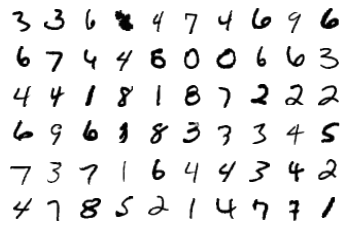

In [54]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [55]:
class Model(nn.Module):
  def __init__(self,input = 23, output=10,hidden=64):
    super(Model,self).__init__()
    self.mod = nn.Sequential(
        nn.Linear(input,hidden*2),
        nn.ReLU(),
        nn.Linear(hidden*2,hidden),
        nn.ReLU(),
        nn.Linear(hidden,output),
        nn.LogSoftmax(dim =1),
    )
  def forward(self,x):
    return self.mod(x)

In [56]:
loss_fn = nn.NLLLoss()
images, labels = next(iter(trainloader))
input_dim = images.view(images.shape[0],-1).shape[1]
batch_size = images.view(images.shape[0],-1).shape[0]

In [57]:
model = Model(input=input_dim).to('cuda')

In [58]:
print(model)

Model(
  (mod): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax(dim=1)
  )
)


In [59]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.003)

In [ ]:
epochs = 50
losses = []
for i in range(epochs):
  print(i)
  for images,labels in trainloader:
    flatten_image = images.view(images.shape[0],-1).to('cuda')

    y_predt = model(flatten_image).squeeze()
    loss = loss_fn(y_predt,labels.to('cuda'))
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

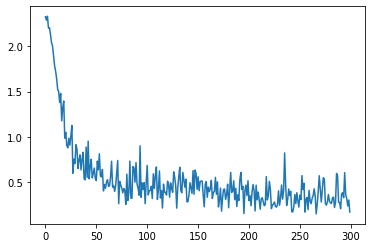

In [67]:
plt.plot(range(300),losses[:300])

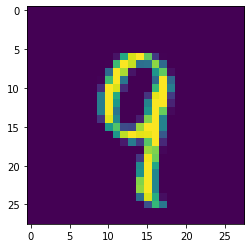

In [91]:
plt.imshow(images[28].numpy().squeeze())

In [95]:
input_ = images[28].view(images.shape[1],-1)
input_pred = input_.to('cuda')
predict = model(input_pred).to('cuda')

In [96]:
predict

tensor([[-3.9987e+01, -2.1175e+01, -1.5640e+01, -1.5401e+01, -5.5608e+00,
         -1.9052e+01, -4.5775e+01, -1.0683e+01, -2.3995e+01, -3.8764e-03]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [97]:
ps = torch.exp(predict)
ps

tensor([[4.3028e-18, 6.3683e-10, 1.6123e-07, 2.0481e-07, 3.8456e-03, 5.3165e-09,
         1.3182e-20, 2.2939e-05, 3.7926e-11, 9.9613e-01]], device='cuda:0',
       grad_fn=<ExpBackward>)